# 선형회귀분석의 기초

## 1. 선형회귀분석 이란
- 회귀분석은 독립변수 x에 대응하는 종속변수 y와 가장 비슷한 $\hat{y}$를 출력하는 함수 f(x)를 찾는 과정이다.
    - $\hat{y} = f(x) \approx y$
- `선형회귀모형 linear regression model` : 독립변수 x 벡터(D차원)와 가중치 벡터 w(D차원)의 선형 조합으로 이루어진 함수 f(x).
    - $\hat{y} = w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D = w_0 + w^Tx$
    - 독립변수 : x=(x1, x2, ..., xD)
    - 가중치벡터 : w=(w0, w1, w2, ..., wD)
- 가중치 벡터 w는 함수 f(x)의 **계수(cofficient)** 이면서 이 선형회귀모형의 **모수(parameter)** 라고 한다.       

## 2. 상수항 결합
- `상수항 결합 bias augmentation` : "회귀분석모형을 간단하게 만들기 위해서" 상수항을 독립변수 데이터에 추가하는 것
    - x=(x1, x2, ..., xD) -> x_a=(1, x1, x2, ..., xD)
    - 모든 독립변수 xi 벡터의 맨 앞에 상수 1을 추가함
    - 이것을 행벡터로 모아 놓으면 X 행렬의 1번째 열이 일벡터가 된다.
    
$X_a = \begin{bmatrix}
1& x_{1,1}& x_{2,2}& \cdots& x_{1,D} \\
1& x_{2,1}& x_{2,2}& \cdots& x_{2,D} \\
1& x_{N,1}& x_{N,2}& \cdots& x_{N,D} \\
\end{bmatrix}$    
    
- 상수항 결합한 경우 선형회귀모형은 내적으로 간단하게 표시된다.
    - $f(x) = 1w_0 + w_1x_1 + w_2x_2 + \cdots + w_Dx_D = x_a^Tw_a = w_a^Tx_a$
    - 독립변수 x의 첫번째 원소 1과 가중치 w의 첫번째 원소 w0를 곱한 값이 수식의 첫번째에 오게 된다.
- 일반적으로 선형회귀모형은 모두 상수항결합을 한다. 따라서 x_a, w_a라고 표시하지 않아도 상수항 1이 추가 되었다는 것으로 생각한다. 

### 2-1. 상수항 결합을 statsmodels 패키지로 구하기
- add_constant(X) : 상수항 결합 함수에 행렬을 넣으면 상수항 결합된 행렬이 된다.

In [1]:
X0 = np.arange(10).reshape(5, 2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [2]:
import statsmodels.api as sm

In [3]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

## 3. 최소자승법
- `최소자승법 OLS (Ordinary Least Squares)` : 잔차제곱합(RSS:Residual Sum of Square)을 최소화하는 가중치 벡터를 구하는 방법
- 예측모형 : 상수항이 결합 된 선형모형
    - $\hat{y} = Xw$
- 잔차벡터 : residual vector : e
    - $e = y - \hat{y} = y - XW$
- 잔차 제곱합 : RSS Residual Sum of Squares : 잔차의 크기, 놈의 제곱
    - $RSS = e^Te \\
    = (y-Xw)^T(y-Xw) \\
    = y^Ty - y^TXw - w^TX^Ty - w^TX^TXw \,\,\, ((w^TX^Ty = (Xw)^Ty = (y^T(Xw))^T = \text{스칼라이므로 T를 없앰} = y^TXW)) \\
    = y^Ty - 2y^TXw + w^TX^TXw$
- 이 잔차의 크기 RSS를 가장 작게 만드는 가중치 벡터 w를 구하는 것이 목표이다. 따라서 RSS를 w로 미분한다. 스칼라값을 벡터로 미분하여 도함수를 만들면 그레디언트 벡터가 된다. 
    - $\dfrac{dRSS}{dw} = - 2X^Ty + 2X^TXw$
    - 두번째 항은 가중합의 미분 공식을 사용 : $\dfrac{d(X^Ty)^Tw}{dw} = \dfrac{dh^Tw}{dw} = h = X^Ty$
    - 세번째 항은 이차형식의 미분 공식을 사용
- RSS가 최소가 되는 최적화 조건은 그레디언트 벡터가 0이어야 한다.
    - $\dfrac{dRSS}{dw} = - 2X^Ty + 2X^TXw = 0$
    - $X^TXw^* = X^Ty$
- **X^TX 행렬의 역행렬이 존재한다면 최적 가중치 벡터 w를 구할 수 있다.**
    - $w^* = (X^TX)^{-1}X^Ty$
- RSS의 도함수인 그레디언트 벡터를 한번 더 미분하면 헤시안 행렬이 된다.
    - $\dfrac{d^2 RSS}{d^2w} = 2X^TX$
- RSS의 최소값의 위치를 구하려면 그레디언트 벡터가 0이어야하고 2차 도함수인 헤시안 행렬이 양의 정부호(positive definite)이어야 한다.
    - $\dfrac{d^2 RSS}{d^2w} = 2X^TX > 0$
- 따라서 X^TX 공분산 행렬이 역행렬이 존재하고, 양의 정부호이어야 한다면, 최소한 X의 각 행렬이 서로 독립어야 한다. X가 풀랭크이어야 한다.     

## 4. 직교 방정식
- `직교 방정식 normal equation` : 그레디언트가 0벡터가 되는 관계를 나타내는 식.
    - $X^Ty - X^TXw = 0 \\
     = X^T(y-Xw) = 0 \\
     = X^Te = 0$
- 행렬 X를 열벡터로 나타내면 X=[c_1, c_2, ..., c_d] 가 된다. 따라서 직교 방정식에 의해서 모든 c_d^T는 e벡터와 내적하면 0이된다. 즉 c_d는 잔차 벡터 e와 직교한다.
    - $c_d^Te = 0 (d=0, 1,\cdots,D)$
- 직교방정식으로 부터 두가지 성질을 알 수 있다.
- 1) 예측 모형에 상수항이 있는 경우 잔차 벡터의 모든 합은 0이다. 상수항인 c_0와 잔차 벡터 e를 내적한 값이 0이기때문이다. 이로부터 잔차벡터의 평균도 0이라는 것을 알 수 있다.
    - $c_0^Te = 1^Te = \sum_{i=0}^{N} e_i = 0$
- 2) x데이터의 평균값에 대한 예측값은 y데이터의 평균값과 같다.
    - $\bar{y} = \dfrac{1}{N}1^Ty \\
    = \dfrac{1}{N}1^T(Xw + e) \\
    = \dfrac{1}{N}1^TXw + \dfrac{1}{N}1^Te, \,\, (\bar{e}=0) \\
    = \dfrac{1}{N}1^TXw \\
    = \dfrac{1}{N}1^T[c_1, c_2, \cdots, c_m]w \\
    = [\dfrac{1}{N}1^Tc_1, \cdots, \dfrac{1}{N}1^Tc_D]w \\
    = [\bar{c}_1, \cdots, \bar{c}_D]w \\
    = \bar{x}^Tw$

## 5. NumPy를 이용한 선형 회귀분석
- OLS 방법으로 선형회귀 분석 실행
    - 최소자승법 Ordinary Least Squares

In [1]:
from sklearn.datasets import make_regression

In [2]:
bias = 100
X0, y, w = make_regression(n_samples=200, n_features=1, bias=bias,
                          noise=10, coef=True, random_state=1)

### 5-1. 선형회귀분석의 결과값 확인

#### 독립변수

In [3]:
X0

array([[ 0.23249456],
       [-0.03869551],
       [ 0.5505375 ],
       [ 0.50318481],
       [ 2.18697965],
       [-0.0731127 ],
       [-0.26788808],
       [-1.62743834],
       [ 0.53035547],
       [ 0.16938243],
       [-0.64691669],
       [ 0.51292982],
       [ 0.86888616],
       [ 0.87616892],
       [-0.10174587],
       [ 1.96710175],
       [ 1.23616403],
       [ 0.79280687],
       [-0.0126646 ],
       [-1.09491185],
       [ 1.04444209],
       [ 0.28558733],
       [ 0.59357852],
       [ 1.74481176],
       [-1.37311732],
       [-0.87785842],
       [ 0.90085595],
       [-0.11044703],
       [-0.07557171],
       [ 1.16033857],
       [-1.23005814],
       [ 0.74055645],
       [-0.29664115],
       [-1.85798186],
       [ 0.2135339 ],
       [-2.02220122],
       [ 0.37756379],
       [ 0.81095167],
       [ 1.2245077 ],
       [-0.22232814],
       [ 2.19069973],
       [-0.67124613],
       [ 0.4202822 ],
       [-1.07296862],
       [-1.14434139],
       [ 0

#### 종속변수

In [4]:
y

array([ 127.87901739,   93.03291422,  161.8575084 ,  141.69205026,
        283.26011945,   90.25696513,   56.03995466,  -42.34640353,
        141.31386351,  124.09193693,   39.41917167,  135.07481793,
        178.08066288,  180.36872137,   89.19700235,  277.68618624,
        202.52143015,  165.39865332,  106.38565624,   -1.06621849,
        185.12242638,  112.67820029,  151.75241542,  260.90931323,
        -17.9616411 ,   31.01126238,  179.2938956 ,   83.19417584,
        100.66930574,  206.12479851,  -12.22124607,  164.77212573,
         54.65764624,  -51.08607086,  121.03299419,  -65.9912507 ,
        123.47026771,  205.83869473,  205.19728016,   95.38016322,
        291.19019753,   45.7309971 ,  124.78046825,   -1.74260654,
        -26.18459865,  134.53858888,  252.09968374,  109.61418894,
        232.3968079 ,  128.08147968,  159.05974492,   65.07874616,
         38.39346876,   31.49882354,   32.77358586,  181.15848795,
        138.26384731,  160.01026797,   26.20090161,   95.94347

#### 모수값(계수, 가중치벡터)

In [5]:
w

array(86.44794301)

### 5-2. 현재 만들어진 선형회귀모형
- y= 100 + 86.44794301x + epsilon
    - 잔차 + wx + 잡음

## 6. OLS 해를 직접 계산하여 계수 추정

### 6-1. 독립변수, 종속변수 형태 변환
- 독립변수는 상수항 결합, 종속변수는 2차원 배열의 형태로 변환

In [6]:
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [7]:
X

array([[ 1.        ,  0.23249456],
       [ 1.        , -0.03869551],
       [ 1.        ,  0.5505375 ],
       [ 1.        ,  0.50318481],
       [ 1.        ,  2.18697965],
       [ 1.        , -0.0731127 ],
       [ 1.        , -0.26788808],
       [ 1.        , -1.62743834],
       [ 1.        ,  0.53035547],
       [ 1.        ,  0.16938243],
       [ 1.        , -0.64691669],
       [ 1.        ,  0.51292982],
       [ 1.        ,  0.86888616],
       [ 1.        ,  0.87616892],
       [ 1.        , -0.10174587],
       [ 1.        ,  1.96710175],
       [ 1.        ,  1.23616403],
       [ 1.        ,  0.79280687],
       [ 1.        , -0.0126646 ],
       [ 1.        , -1.09491185],
       [ 1.        ,  1.04444209],
       [ 1.        ,  0.28558733],
       [ 1.        ,  0.59357852],
       [ 1.        ,  1.74481176],
       [ 1.        , -1.37311732],
       [ 1.        , -0.87785842],
       [ 1.        ,  0.90085595],
       [ 1.        , -0.11044703],
       [ 1.        ,

In [8]:
y

array([[ 127.87901739],
       [  93.03291422],
       [ 161.8575084 ],
       [ 141.69205026],
       [ 283.26011945],
       [  90.25696513],
       [  56.03995466],
       [ -42.34640353],
       [ 141.31386351],
       [ 124.09193693],
       [  39.41917167],
       [ 135.07481793],
       [ 178.08066288],
       [ 180.36872137],
       [  89.19700235],
       [ 277.68618624],
       [ 202.52143015],
       [ 165.39865332],
       [ 106.38565624],
       [  -1.06621849],
       [ 185.12242638],
       [ 112.67820029],
       [ 151.75241542],
       [ 260.90931323],
       [ -17.9616411 ],
       [  31.01126238],
       [ 179.2938956 ],
       [  83.19417584],
       [ 100.66930574],
       [ 206.12479851],
       [ -12.22124607],
       [ 164.77212573],
       [  54.65764624],
       [ -51.08607086],
       [ 121.03299419],
       [ -65.9912507 ],
       [ 123.47026771],
       [ 205.83869473],
       [ 205.19728016],
       [  95.38016322],
       [ 291.19019753],
       [  45.730

### 6-2. OLS 로 해를 구하면
- hat{y} = 99.79150869 + 86.96171201x
- 최소자승법으로 구한 해는 선형회귀모형과 비슷하지만 완전하게 똑같지는 않다.
- bias 값이 함께 반환된다.

In [9]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

### 7. 여러가지 입력값을 대입하여 y와 hat{y}를 비교
- np.dot(X, w) : 내적
    - X는 상수항 결합을 했으므로 (10,2) 행렬
    - w는 (2,1) 행렬
    - X@w는 (10,1) 행렬로 bias + w@x의 값이 반환된다. 

In [10]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)
y_new = np.dot(X_new, w)

In [11]:
y_new

array([[-111.94615175],
       [ -63.99001926],
       [ -16.03388677],
       [  31.92224573],
       [  79.87837822],
       [ 127.83451071],
       [ 175.7906432 ],
       [ 223.7467757 ],
       [ 271.70290819],
       [ 319.65904068]])

#### OLS로 구한 샘플의 직선과 원래 데이터의 직선이 거의 일치 한다.

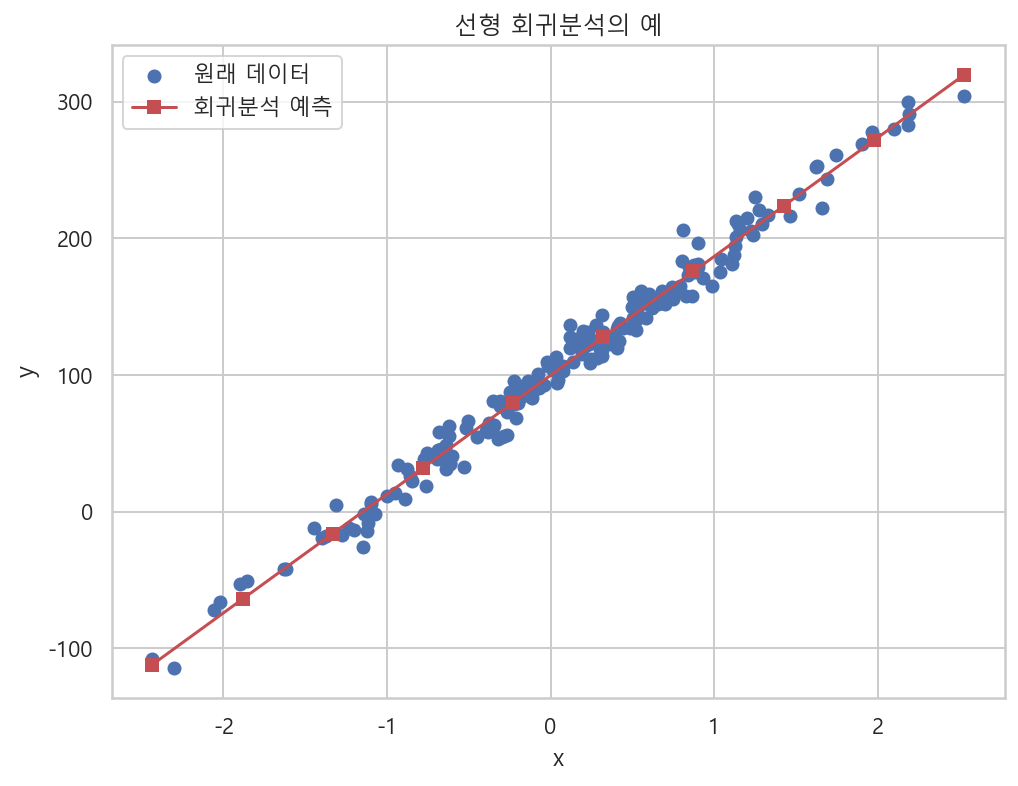

In [14]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show() ; 

## 8. sciket-learn 패키지를 사용한 선형 회귀분석
- scikit-learn 패키지의 linear_model 서브패키지의 LinearRegression 클래스를 사용한다.

### 8-1. 순서
- LinearRegression 클래스 객체 생성
    - fit_intercept 인수 : 모형에 상수항이 있는지 여부 설정. 디폴트 True.
- fit 메서드로 가중치 값을 추정한다. 
    - 상수항 결합을 자동으로 해준다. add_constant() 명령어 사용 안해도 된다.
- fit 메서드 호출하면 모형 객체는 다음과 같은 속성을 갖는다.
    - coef_ : 추정된 가중치 벡터 
    - intercept_ : 추정된 상수항
    - 객체 자신을 반환한다. 
- predict 메서드로 새로운 입력 데이터에 대한 출력 데이터를 예측    

In [15]:
from sklearn.linear_model import LinearRegression

### 8-2. LinearRegression 객체 생성 후 fit 메서드 호출
- OLS 로 구한 값과 같다.
    - bias와 가중치값

In [16]:
model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


### 8-3. 예측
- 임의의 데이터를 넣어주면 출력 데이터의 예측값을 반환한다.

In [17]:
model.predict([[-2], [-1], [0], [1], [2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

## 9. statsmodels 패키지를 사용한 선형 회귀분석
- statsmodels 패키지의 OLS 클래스를 사용한다.

### 9-1. 순서
- 독립변수와 종속변수로 이루어진 데이터 프레임 생성 df
- OLS 객체 생성 (두 가지)
    - 데이터 프레임을 직접 사용, formula 문자열 사용
        - models = OLS.from_formula(formula, data=df)
        - 독립변수에 상수항 결합 안해도 된다.
    - 데이터 프레임이 아닌 독립변수와 종속변수를 각각 인수를 넣어서 만들기
        - models = OLS(dfx, dfy) : dfx에 상수항 결합 해주어야 한다.
- fit 메서드로 모형 추정
    - RegressionResults 클래스 객체로 출력
    - result = model.fit()
- 결과 확인
    - RegressionResults 클래스 객체는 리포트 summary 메서드와 예측 prediction 메서드를 반환해준다.
    - result.summary(), result.predict(x)

### 9-2. 데이터 프레임 만들기

In [18]:
df = pd.DataFrame({"x" : X0[:, 0], "y" : y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


### 9-3. OLS 모델 객체 생성 1
- formula 문자열과 데이터 프레임을 사용한 OLS 모델 객체
    - formula 문자열에 종속변수 이름과 독립변수 이름을 ~ 기호로 구분해준다.
    - 독립변수가 많으면 formula 문자열 사용 방법에 따라서 추가해준다.
    - "x1 + x2 + x3"

In [20]:
model = sm.OLS.from_formula("y ~ x", data=df)
model

In [21]:
result = model.fit()

In [22]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          8.17e-182
Time:                        15:46:15   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [29]:
result.predict({"x" : [-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

### 9-4. OLS 모델 객체 생성 2 
- 데이터 프레임에서 독립변수와 종속변수를 각각 분리하여 사용하는 방법
- 상수항 결합을 해주어야 한다.
- 이렇게 생성한 OLS 모델로 예측을 할 경우, 새로운 입력값에 상숭항 결합을 해주어야 한다. 

In [27]:
dfy = df[["y"]]
dfx = sm.add_constant(df[["x"]])
model2 = sm.OLS(dfy, dfx)
result2 = model2.fit()

In [28]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          8.17e-182
Time:                        15:49:01   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [33]:
xxx = np.array([[-2], [-1], [0], [1], [2]])
xxx

array([[-2],
       [-1],
       [ 0],
       [ 1],
       [ 2]])

In [34]:
test_x = sm.add_constant(xxx)
test_x

array([[ 1., -2.],
       [ 1., -1.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.]])

In [35]:
result2.predict(test_x)

array([-74.13191534,  12.82979668,  99.79150869, 186.7532207 ,
       273.71493272])

### 9-5. RegressionResults 클래스의 여러가지 속성
- 여러가지 속성들이 저장된다. 추후에 다시 사용할 수 있다.
- params : 상수항과 가중치
- resid : 잔차

In [36]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

In [37]:
result.resid

0       7.869384
1      -3.393567
2      14.190317
3      -1.857271
4      -6.714883
         ...    
195     3.077420
196    -9.127772
197   -10.832299
198    14.543212
199     7.161656
Length: 200, dtype: float64

### 9-6. 잔차 벡터의 형태

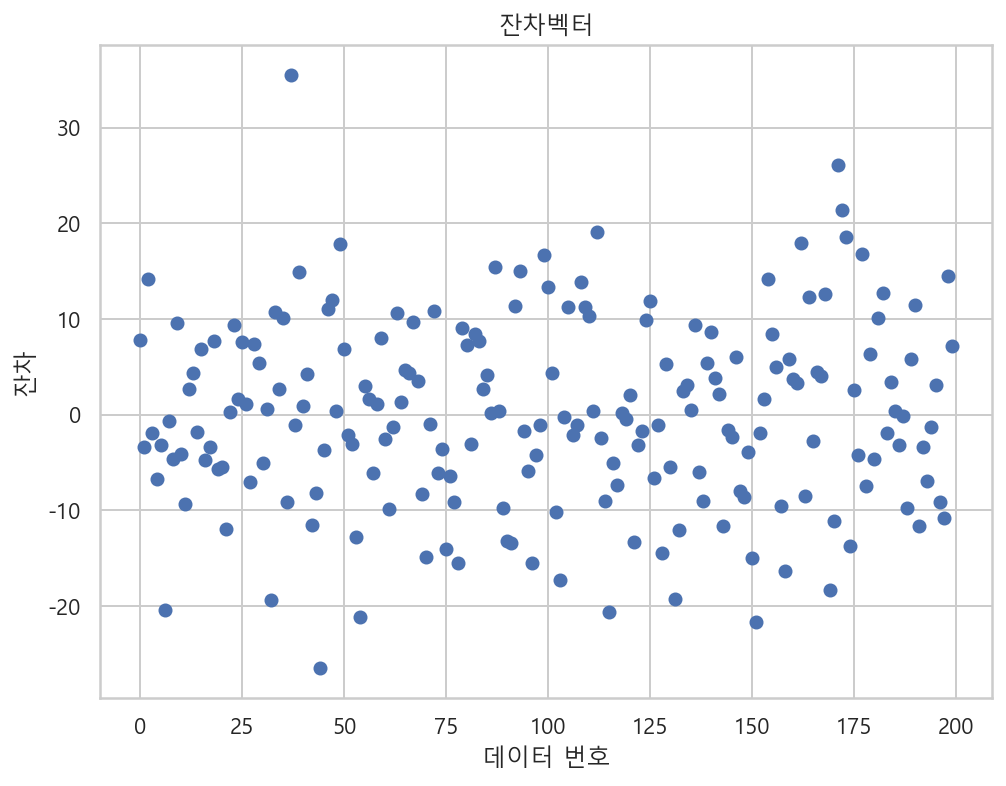

In [39]:
plt.figure(figsize=(8, 6))
result.resid.plot(style="o")
plt.title("잔차벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show() ; 

### 9-7. 직교 방정식의 내용 검증
- 상수항 결합된 모형의 모든 잔차의 합은 0
- x의 평균값은 y의 평균값과 같다.

In [40]:
result.resid.sum()

6.064482249712455e-12

In [41]:
result.predict({"x" : X0.mean()})

0    109.069351
dtype: float64

In [42]:
y.mean()

109.06935068170773

## 10. 보스턴 집값 예측
- statsmodels의 OLS 명령으로 보스턴 집값 데이터를 선형회귀분석 해본다.
- formula 문자열 사용 방식으로 OLS 모델을 만들면 모든 독립변수의 이름을 추가해 주어야 한다. 
    - .join() 을 사용하면 쉽게 추가할 수 있다.

### 10-1. 보스턴 집값 데이터 임포트
- 독립변수 데이터 프레임 생성 : 상수항 결합
- 종속변수 데이터 프레임 생성

In [43]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfx = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [45]:
dfx.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [46]:
dfy.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 10-2. OLS 모델 생성

In [47]:
model_boston2 = sm.OLS(dfy, dfx)
model_boston2

### 10-3. OLS 모델 훈련
- 선형회귀모형 분석

In [48]:
result_boston2 = model_boston2.fit()
result_boston2

### 10-4. 결과 확인
- summary 레포트의 여러가지 수치 확인-
- 가중치 벡터 = coefficient

In [49]:
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          6.72e-135
Time:                        16:01:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0